In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

# Image Classifier Model

In [2]:
data_dir = 'D:\sales project models two\Images Data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Found 305 files belonging to 2 classes.


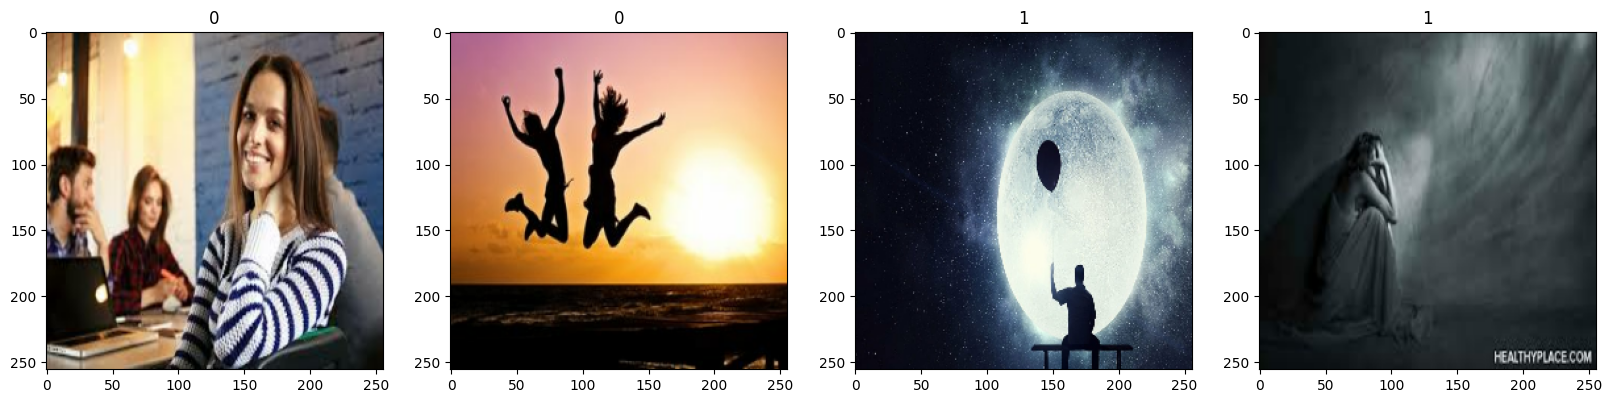

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [4]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.9687423 , 0.9687423 , 0.9687423 ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.9687423 , 0.9687423 , 0.9687423 ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.9687423 , 0.9687423 , 0.9687423 ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334]],
 
         ...,
 
         [[0.68619025, 0.6548177 , 0.6069317 ],
          [0.69011

In [5]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [8]:
ImageModel = Sequential()
ImageModel.add(Input(shape=(256, 256, 3)))
ImageModel.add(Conv2D(16, (5,5), 1, activation='relu'))
ImageModel.add(MaxPooling2D())
ImageModel.add(Conv2D(32, (5,5), 1, activation='relu'))
ImageModel.add(MaxPooling2D())
ImageModel.add(Conv2D(16, (5,5), 1, activation='relu'))
ImageModel.add(MaxPooling2D())
ImageModel.add(Flatten())
ImageModel.add(Dense(256, activation='relu'))
ImageModel.add(Dense(1, activation='sigmoid'))
ImageModel.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
ImageModel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 16)     │        12,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,238,641 (12.35 MB)

 Trainable params: 3,238,641 (12.35 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
logdir='logs of ImageClassifier'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = ImageModel.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
#ImageModel.save(os.path.join('models','imageclassifier.h5'))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 917ms/step - accuracy: 0.5266 - loss: 0.7606 - val_accuracy: 0.5469 - val_loss: 0.6778
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 854ms/step - accuracy: 0.5781 - loss: 0.6625 - val_accuracy: 0.5156 - val_loss: 0.6901
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 894ms/step - accuracy: 0.6356 - loss: 0.6332 - val_accuracy: 0.7188 - val_loss: 0.6252
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 782ms/step - accuracy: 0.7591 - loss: 0.5555 - val_accuracy: 0.7812 - val_loss: 0.3480
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 781ms/step - accuracy: 0.7671 - loss: 0.4956 - val_accuracy: 0.7188 - val_loss: 0.4880
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 825ms/step - accuracy: 0.7554 - loss: 0.4648 - val_accuracy: 0.7812 - val_loss: 0.4372
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 815ms/step - accuracy: 0.8531 - loss: 0.3967 - val_accuracy: 0.8750 - val_loss: 0.3545
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 757ms/step - accuracy: 0.8717 - loss: 0.2871 - val_accuracy: 0.9688 - val_loss

In [10]:
ImageModel.save(os.path.join('models','ImageClassifierModel.keras'))

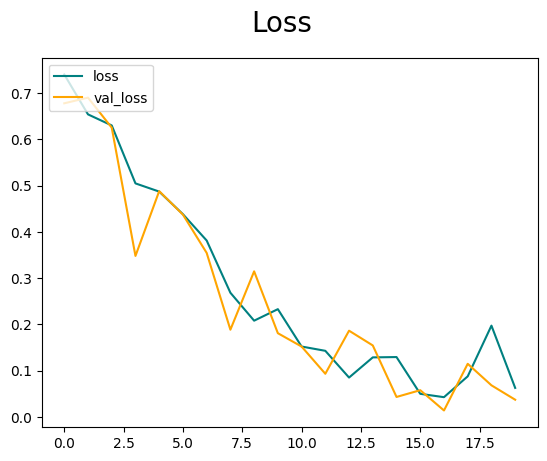

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

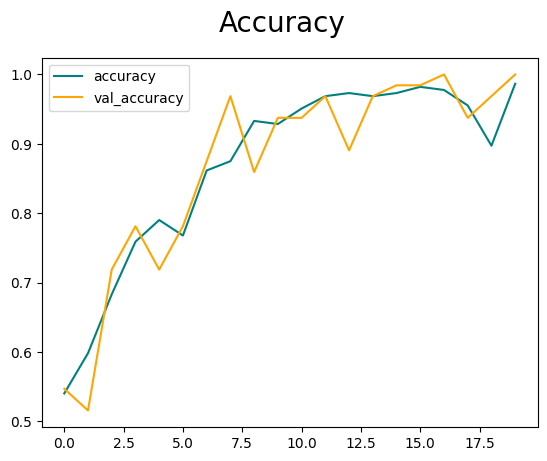

In [12]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()